### Hand Written Digit classification using Tensorflow

In this Tutorial we will construct a deep neural network model using tensorflow library for Classifying hand written digits.
To know more about core Tensorflow , Refer to another tutorial:

This tutorial aims at 
1. Train the model to recognize digits by having it "look" at thousands of examples using Tensorflow datagraph.
2. Check the model's accuracy with test data

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load MNIST Data
we can use tensorflow existing function for loading MNIST data. 
The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples and 10 target classes (0-9).
Ecah image is 28 x 28 pixel and they are grey scale.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Visualize some images

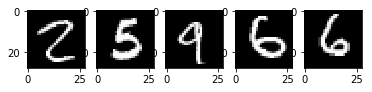

In [40]:
f,ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(np.array(mnist.train.images[i], dtype='float').reshape((28, 28)), cmap='gray')


#### Construct Computational Graph.

Computational graph consist of following components:

##### 1. Placeholders:
   Placeholders are for creating nodes for the input images and target output classes.

In [14]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

x and _y gets value when tensorflow we ask tensorflow to run a computation.
x is a 2D tensor, where number of rows is not mentioned and column value is fixed with 784(28 x 28). During execution phase, rows will be determined based on user's input.
Similarly, for _y column value is fixed with value 10 (1 for each digit) and row value will be determined at execution phase.

##### 2.Variables:
we use variables for weights and biases. This is because, their values are constanly updated during exceution phase to reduce ccost function.

Since there are 784 pixel values and 10 classes, weight matrix will be of size 784 x 10
and bias will have size 10 for 10 digits.

In [15]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

As all the varibles need to be initialized before they are run in execution phase, we need to call a function that take care of initializing all variables.

In [16]:
init= tf.global_variables_initializer()

#### Create Model and Loss Function

The model we will be using to idenify digits is simple Logistic Regressor.In tensorfflow, it only takes one line, We multiply the vectorized input images x by the weight matrix W, add the bias b.

Loss function indicates how bad the model's prediction was on a single example. We try to minimize that while training across all the examples.Tensorflow has many Loss functions define. Here, our loss function is the cross-entropy between the target and the softmax activation function applied to the model's prediction. 

In [17]:
y = tf.matmul(x,W) + b

In [18]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

TensorFlow has a variety of built-in optimization algorithms. For this example, we will use steepest gradient descent, with a step length of 0.5, to descend the cross entropy. 

Model can be saved using tf.train.Saver function

In [19]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
saver = tf.train.Saver()

#### Train the Model

The model is trained using following steps:
1. Create a session to run entire Computational graph.
2. Initialize variables using init function.
3. Model is trained in mini batches of 100 images per step for 1000 epochs(number of times).In each step, parameters weights(W) and biases(b) are updated, constanly improving the model's performance.
4. Finally model is saved for later use.


In [22]:
with tf.Session() as sess:
    sess.run(init)
    for _ in range(1000):
        batch = mnist.train.next_batch(100)
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    save_path = saver.save(sess, "../model.ckpt")
    print("Model saved in file: %s" % save_path)

Model saved in file: ../model.ckpt


#### Evaluate the Model

In model evaluation phase, we will figure out where we predicted the correct label. we use tf.argmax  function which gives the index of the highest entry in a tensor along some axis.
That gives us a list of booleans. To determine what fraction are correct, we cast to floating point numbers and then take the mean to determine the final accuracy. 
we can also plot confusion matrix using tf.confusion_matrix function.

In [27]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
confusion = tf.confusion_matrix(tf.argmax(y, 1),tf.argmax(y_, 1))

In [28]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Load the saved model
We can load the previous saved model using saver.restore() function and then evaluate model accuarcy using MNIST test data.


In [35]:
with tf.Session() as sess:
    saver.restore(sess,"../model.ckpt")
    test_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    test_confusion = sess.run(confusion, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print('Test data accuracy: %g' % (test_accuracy))


INFO:tensorflow:Restoring parameters from ../model.ckpt
Test data accuracy: 0.9149


Below is the code for displaying confusion matrix

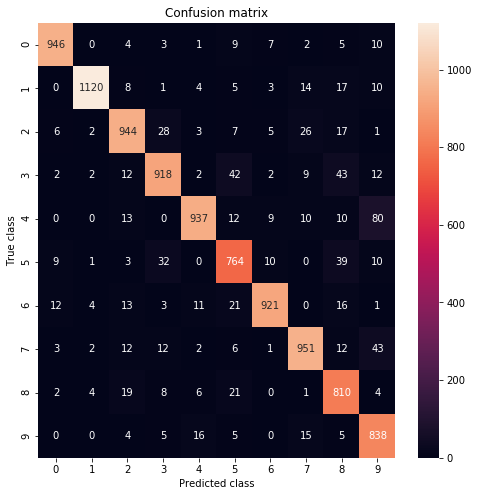

In [36]:
LABELS=[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(8,8))
sns.heatmap(test_confusion, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

References:
    
http://yann.lecun.com/exdb/mnist/

https://www.tensorflow.org/get_started/mnist/beginners

https://www.tensorflow.org/get_started/mnist/pros
